In [1]:
import os
import json
import io
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow.parquet as pq

import cv2
from PIL import Image

from ultralytics import YOLO

In [2]:
# pip install ultralytics

Load Data from Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Constants and Stuff

In [4]:
# image = "/content/drive/MyDrive/Master Project/master_project/data/waymo/training_camera_image_10017090168044687777_6380_000_6400_000.parquet"
# training_camera_image.parquet
image = "/content/drive/MyDrive/Master Project/master_project/data/waymo/"

In [5]:
test = os.path.exists('/content/drive/MyDrive/Master Project/master_project/data/waymo/')
print(test)

True


In [6]:
SPLIT = "training/"

In [7]:
CAMERA_IMAGE_PREFIX = os.path.join(image)

In [8]:
print(CAMERA_IMAGE_PREFIX)

/content/drive/MyDrive/Master Project/master_project/data/waymo/


In [9]:
CUR_INDEX = 0

Helpers

In [10]:
def pq_dataframe_to_image(df):
    image_binary = df["[CameraImageComponent].image"]
    image = Image.open(io.BytesIO(image_binary))
    return image

File Loaders

In [11]:
images2 = os.listdir("/content/drive/MyDrive/Master Project/master_project/data/waymo/")


In [12]:
def load_image(index, frame_number):
    images = os.listdir(CAMERA_IMAGE_PREFIX)
    test_pq_image = os.path.join(CAMERA_IMAGE_PREFIX, images[index])
    print("Image: ", test_pq_image)

    pq_image = pq.read_table(test_pq_image)

    df = pq_image.to_pandas()
    df = df.iloc[frame_number]
    return df

In [13]:
def load_annotations(index, timestamp):
    labels = os.listdir(CAMERA_IMAGE_PREFIX)
    pq_image_label = os.path.join(CAMERA_IMAGE_PREFIX, labels[index])
    print("Annotation: ", pq_image_label)

    pq_label = pq.read_table(pq_image_label)

    df = pq_label.to_pandas()
    return df.loc[df["key.frame_timestamp_micros"] == timestamp]

In [14]:
# directory_path = '/content/drive/MyDrive/Master Project/master_project/data/waymo/'
#  test_pq_image = os.path.join(CAMERA_IMAGE_PREFIX, images[0])


Loading Data

In [15]:
image_df = load_image(index=CUR_INDEX, frame_number=0)
image_df

Image:  /content/drive/MyDrive/Master Project/master_project/data/waymo/training_camera_image_10017090168044687777_6380_000_6400_000.parquet


key.segment_context_name                                                             10017090168044687777_6380_000_6400_000
key.frame_timestamp_micros                                                                                 1550083467346370
key.camera_name                                                                                                           1
[CameraImageComponent].image                                              b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
[CameraImageComponent].pose.transform                                     [0.9482868309813268, -0.23495154098744556, 0.2...
[CameraImageComponent].velocity.linear_velocity.x                                                                  5.765131
[CameraImageComponent].velocity.linear_velocity.y                                                                   1.37127
[CameraImageComponent].velocity.linear_velocity.z                                                                 -1.329111
[CameraImageComponent].velocity.angular_velocity.x                                                                -0.010016
[CameraImageComponent].velocity.angular_velocity.y                                                                -0.014922
[CameraImageComponent].velocity.angular_velocity.z                                                                 0.105475
[CameraImageComponent].pose_timestamp                                                                      1550083467.40108
[CameraImageComponent].rolling_shutter_params.shutter                                                              0.009992
[CameraImageComponent].rolling_shutter_params.camera_trigger_time                                         1550083467.369629
[CameraImageComponent].rolling_shutter_params.camera_readout_done_time                                    1550083467.423879
Name: 10017090168044687777_6380_000_6400_000;1550083467346370, dtype: object

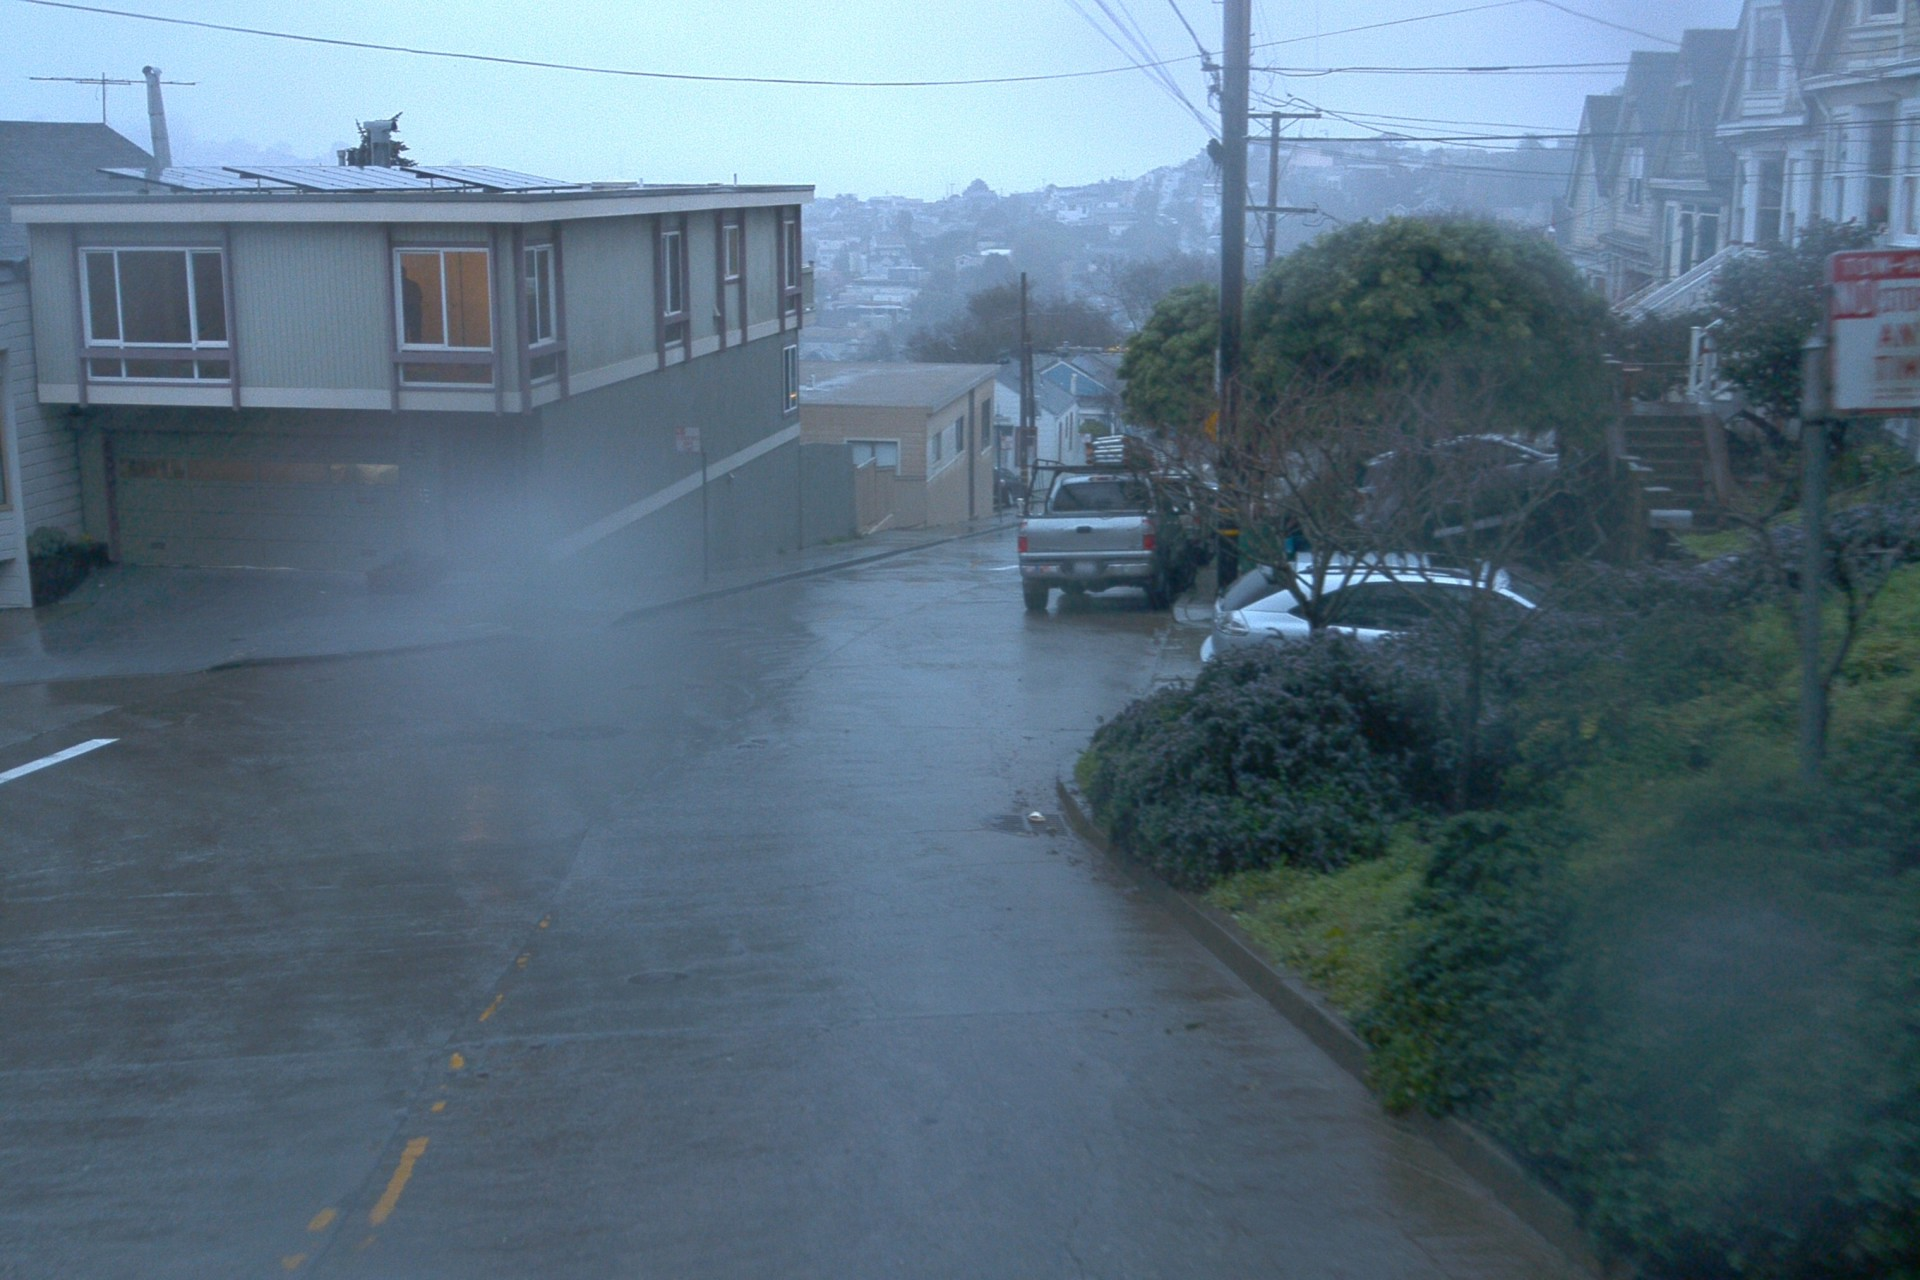

In [16]:
image = pq_dataframe_to_image(image_df)
image

In [17]:
timestamp = image_df["key.frame_timestamp_micros"]

In [18]:
annotations = load_annotations(index=CUR_INDEX, timestamp=timestamp)
annotations.head()

Annotation:  /content/drive/MyDrive/Master Project/master_project/data/waymo/training_camera_image_10017090168044687777_6380_000_6400_000.parquet


key.segment_context_name  \
index                                                                                        
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   

                                                    key.frame_timestamp_micros  \
index                                                                            
10017090168044687777_6380_000_6400_000;15500834...            1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...            1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...            1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...            1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...            1550083467346370   

                                                    key.camera_name  \
index                                                                 
10017090168044687777_6380_000_6400_000;15500834...                1   
10017090168044687777_6380_000_6400_000;15500834...                2   
10017090168044687777_6380_000_6400_000;15500834...                4   
10017090168044687777_6380_000_6400_000;15500834...                3   
10017090168044687777_6380_000_6400_000;15500834...                5   

                                                                         [CameraImageComponent].image  \
index                                                                                                   
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                                                [CameraImageComponent].pose.transform  \
index                                                                                                   
10017090168044687777_6380_000_6400_000;15500834...  [0.9482868309813268, -0.23495154098744556, 0.2...   
10017090168044687777_6380_000_6400_000;15500834...  [0.9487161220058431, -0.23293730459068215, 0.2...   
10017090168044687777_6380_000_6400_000;15500834...  [0.9489391880311817, -0.23197163266142976, 0.2...   
10017090168044687777_6380_000_6400_000;15500834...  [0.9480805733268344, -0.23597955012227076, 0.2...   
10017090168044687777_6380_000_6400_000;15500834...  [0.9479157488563362, -0.23691579285250022, 0.2...   

                                                    [CameraImageComponent].velocity.linear_velocity.x  \
index                                                                                                   
10017090168044687777_6380_000_6400_000;15500834...                                           5.765131   
10017090168044687777_6380_000_6400_000;15500834...                                           5.757565   
10017090168044687777_6380_000_6400_000;15500834...                                           5.762588   
10017090168044687777_6380_000_6400_000;15500834...                                           5.764107   
10017090168044687777_6380_000_6400_000;15500834...                                           5.758528   

                                                    [CameraImageComponent].velocity.linear_velocity.y  \
index                

Running Predictions

In [19]:
model = YOLO('"/content/drive/MyDrive/Master Project/yolo11m.pt')

In [20]:
results = model(image)
results[0]


0: 448x640 1 car, 1 truck, 1029.6ms
Speed: 5.0ms preprocess, 1029.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

car :  0.673486590385437
truck :  0.5407583713531494


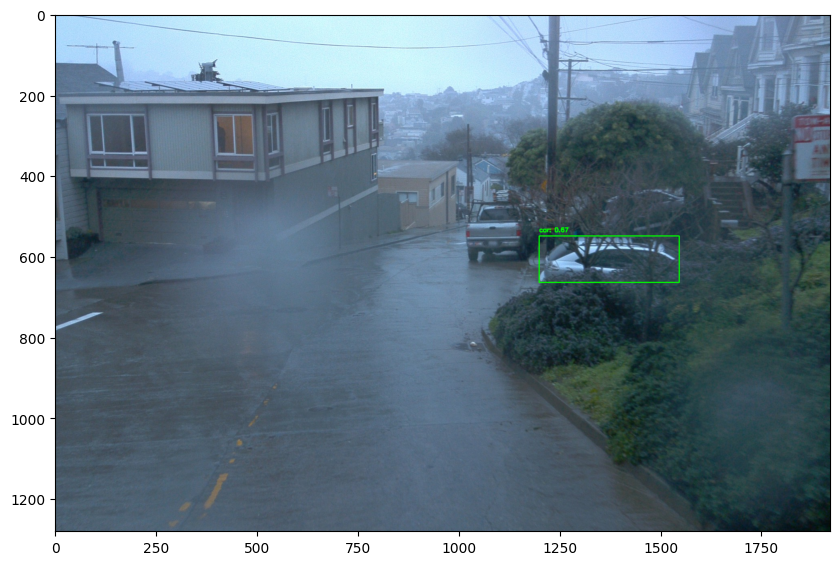

In [21]:
np_im = np.array(image)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
    class_id = int(box.cls)
    class_name = results[0].names[class_id]
    confidence = box.conf.item()

    print(class_name, ": ", confidence)

    if confidence < 0.6:
        continue

    # Draw rectangle and label on the frame
    cv2.rectangle(np_im, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"{class_name}: {confidence:.2f}"
    cv2.putText(np_im, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(np_im)

In [22]:
# np_im2 = np.array(image)

# for i in range(annotations.shape[0]):
#     ann = annotations.iloc[i]

#     if ann["key.frame_timestamp_micros"] != timestamp:
#         continue

#     print(ann)
#     print()

Evaluation

In [23]:
results = model.val(
    data='coco128.yaml',     # Standard COCO dataset configuration
    imgsz=640,               # Input image size
    batch=16,                # Batch size for validation
    conf=0.001,              # Low confidence threshold for comprehensive evaluation
    iou=0.5,                 # IoU threshold
    half=True,               # Use half-precision for faster computation
    plots=True               # Generate performance visualization plots
)

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [3:33:58<00:00, 1604.78s/it]


                   all        128        929      0.812      0.691      0.801      0.614
                person         61        254      0.917      0.693      0.842      0.649
               bicycle          3          6          1      0.627      0.763      0.564
                   car         12         46       0.91      0.261      0.528      0.302
            motorcycle          4          5       0.82          1      0.995      0.829
              airplane          5          6          1      0.943      0.995      0.913
                   bus          5          7      0.868      0.714      0.792      0.713
                 train          3          3       0.84          1      0.995      0.995
                 truck          5         12      0.727        0.5      0.619      0.396
                  boat          2          6      0.931      0.667      0.761      0.617
         traffic light          4         14          1      0.203      0.363      0.222
             stop sig

Print Results

In [24]:
print(f"mAP50: {results.box.map50}")
print(f"mAP50-95: {results.box.map}")
print(f"Precision: {results.box.p}")
print(f"Recall: {results.box.r}")

mAP50: 0.800834794603037
mAP50-95: 0.613803992065782
Precision: [    0.91672           1     0.90993     0.82016           1     0.86782     0.84016     0.72725     0.93068           1     0.82683           1     0.97528     0.76604           1     0.78906     0.99167     0.68316     0.87711      0.9019           1           1     0.81872     0.80176     0.96968     0.84496
     0.70006     0.90252     0.75711     0.57536      0.4712     0.89938     0.61951     0.83042     0.75357     0.88878     0.84806     0.60488     0.67821     0.85972     0.92273     0.66278     0.66306           1     0.68563       0.788     0.57818     0.91087     0.87468     0.78527     0.63791     0.93417
     0.89302     0.71277     0.77059           1     0.76879           1           1     0.92441     0.76845     0.55868      0.3525     0.25482           1     0.74464     0.88525     0.37024     0.63366     0.91438           1]
Recall: [    0.69344     0.62662     0.26087           1     0.94306     0.71429